### Linear Regression with Multiple Variables

1. Import Libs
2. Get Data
3. Visualize Data
4. Split Data
5. Train Model
6. Test Model
7. Evaluating Model
8. Endpoint

In [1]:
# 1 Import Libs

# data structures
import pandas as pd
import numpy as np

# lib for files access
from pathlib import Path
myfolder = Path("C:/Users/pdpc/Documents/MLfiles/Data/")

# evaluation
from scipy import stats

# for graphs
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

# libs ColTransf / Pipeline / GridSearch
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# 2 Get data from file path

data = pd.read_excel(myfolder / "insurance.xlsx", sheet_name="ins_unchanged")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# X / y split (this will retain the data in dataframe)
target_column = ["charges"]
X  = data.drop(target_column, axis=1)
y  = data[target_column].copy()

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


<AxesSubplot:>

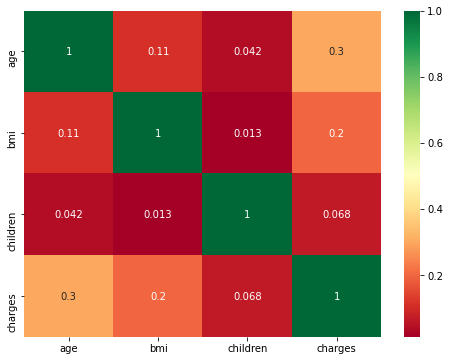

In [3]:
# 3 exlore data

# correlation matrix with formating
# control size,labels
rcParams['figure.figsize'] = 8,6
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [6]:
num_std_features = list(X.select_dtypes(include=['int64', 'float64']).columns.values)
cat_ore_features = list(X.select_dtypes(include=['object', 'category','bool']).columns.values)

print("Features to be standardized:", num_std_features,)
print("Features to be ordinalencoded:", cat_ore_features,)

Features to be standardized: ['age', 'bmi', 'children']
Features to be ordinalencoded: ['sex', 'smoker', 'region']


In [7]:
# Preprocessor

preprocessor = ColumnTransformer(transformers=[
                    ('numTran',StandardScaler(),num_std_features),
                    ('catTran',OrdinalEncoder(),cat_ore_features)
                    ])

In [8]:
# Splitting Train/Test for holdout/LOO
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# Scale data

X_train = preprocessor.fit_transform(X_train0)
X_test = preprocessor.fit_transform(X_test0)

X_train[0]

array([ 0.69703804, -0.59223727, -0.07049671,  0.        ,  0.        ,
        3.        ])

In [10]:
# More Libs

# model libs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# CV/kfold libs
from sklearn.model_selection import cross_val_score, KFold

In [21]:
# Evaluation for Regression Tasks

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


models = [LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),Ridge()]
names  = ['Lin','KNN', 'SVR', 'RAF','GBR','Rid']

R2 = []
RMSE = []
RMSE_CV = []
MAE = []
Acc_Train = []
Acc_Test = []
RMSE_CV = []
RMSE_CV_sdv=[]

for model,name in zip(models,names):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    R2.append("%.4f" % r2_score(y_test,y_pred))
    mse = mean_squared_error(y_test,y_pred)
    RMSE.append("%.4f" % np.sqrt(mse))
    MAE.append( "%.4f" % mean_absolute_error(y_test, y_pred))
    Acc_Train.append("%.4f" % model.score(X_train, y_train))
    Acc_Test.append("%.4f" % model.score(X_test, y_test))

    # CV scores
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    RMSE_CV.append("%.4f" % rmse_scores.mean())
    RMSE_CV_sdv.append("%.4f" % rmse_scores.std())
    
    if name == "Lin":
        print("LinReg Intercept:     ", "%.2f" % model.intercept_)
        print("LinReg Coefficient(s): ", model.coef_)     

# Round based on sigfigs (automate this if you can)
# Check for other metrics: fit of train/test - indicates overfit/underfit
'''
print(names)
print(R2)
print(RMSE)
print(MAE)
print(Acc_Train)
print(Acc_Test)
'''
print('perfecto')

LinReg Intercept:      8911.95
LinReg Coefficient(s):  [[ 3566.08276722  1850.53217738   690.44495643   -28.25543441
  24048.20500576  -321.55801784]]
perfecto


In [22]:
# Getting evaluation data into evaluation table


C = pd.DataFrame({'R2':R2,'RMSE':RMSE,'MAE':MAE,'Acc_Train':Acc_Train,'Acc_Test':Acc_Test,'RMSE_CV':RMSE_CV,'RMSE_CV_sdv':RMSE_CV_sdv})

C = C.T
C.columns = names
C

# Have RMSE/MAE by correct sig figs
# add column with average of R2,
# get best estimator (column name of max value of numbers in row)

,Lin,KNN,SVR,RAF,GBR,Rid
R2,0.7532,0.6422,-0.0871,0.8291,0.8548,0.7535
RMSE,6065.9745,7303.1885,12729.9452,5047.6413,4652.5421,6062.1637
MAE,4116.3619,4120.1005,8324.0195,2716.0437,2557.5764,4125.8337
Acc_Train,0.7494,0.8241,-0.1049,0.9761,0.9041,0.7494
Acc_Test,0.7532,0.6422,-0.0871,0.8291,0.8548,0.7535
RMSE_CV,6075.2075,6826.1966,12681.8782,4833.3836,4579.9290,6075.9722
RMSE_CV_sdv,438.5926,247.0830,707.2552,438.1609,422.8619,433.0421


In [25]:
# Linear Regression Coefficients

reg_lin = LinearRegression().fit(X_train,y_train)

print("LinReg Intercept:       ", "%.2f" % reg_lin.intercept_)
print("LinReg Coefficient(s):  ", reg_lin.coef_) 

LinReg Intercept:        8911.95
LinReg Coefficient(s):   [[ 3566.08276722  1850.53217738   690.44495643   -28.25543441
  24048.20500576  -321.55801784]]


In [ ]:
# Further

try bagging & adaboost on Random Forest to see if overfitting can be fixed